In [ ]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 2.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 2.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for cartopy: filename=cartopy-0.24.1-cp310-cp310-linux_aarch64.whl size=11539013 sha256=37f0a6e96e149bbdf9212a875402c62fa2941f2fd429003c822f521675e86806
  Stored in directory: /tmp/pip-ephem-wheel-cache-w9qj4p1p/wheels/0b/0a/e9/0e55c99601682741df81e68718d10d27136d44da78ae0f2b64
Successfully built cartopy


(721, 1440)


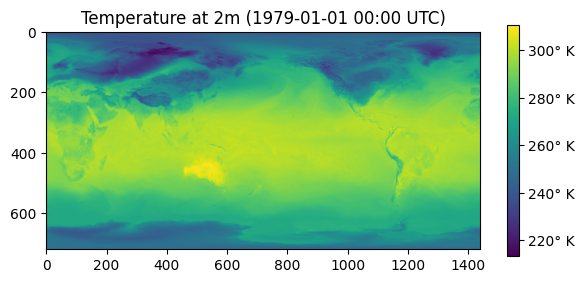

In [18]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

# Open h5 file
with h5py.File('/iopsstor/scratch/cscs/stefschu/DSM500/data/FCN_ERA5_data_v0/train/1979.h5', 'r') as f:
    t = np.array(f["fields"][0, 2])

#t = np.concatenate([t[:, 720:], t[:, :720]], axis=1)
print(t.shape)

plt.figure(figsize=(7, 3))
plt.title('Temperature at 2m (1979-01-01 00:00 UTC)')
im = plt.imshow(t)
plt.colorbar(im, format='%.0f° K')
plt.show()

In [11]:
import cartopy
import os

# Set the environment variable
cartopy.config["data_dir"] = os.environ["CARTOPY_USER_DATA_DIR"] = "/iopsstor/scratch/cscs/stefschu/DSM500/cache"

print("Cartopy cache directory:", cartopy.config["data_dir"])


Cartopy cache directory: /iopsstor/scratch/cscs/stefschu/DSM500/cache


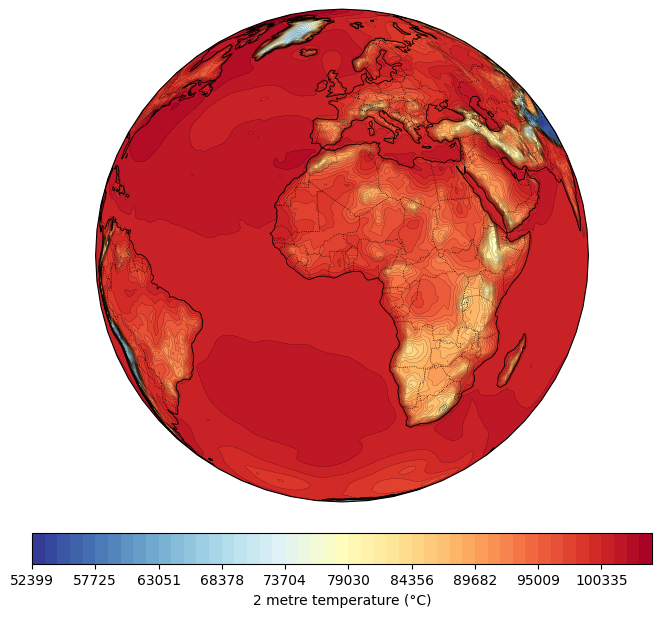

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from skimage.transform import resize
reduction_factor = 4
new_size = (t.shape[0]//reduction_factor, t.shape[1]//reduction_factor)
t_new = resize(t, new_size, anti_aliasing=True)


# Assuming t is already loaded as (721, 1440)
# Define latitudes and longitudes based on common grids
lat = np.linspace(90, -90, t_new.shape[0])  # 721 latitudes from 90°N to 90°S
lon = np.linspace(-180, 180, t_new.shape[1])  # 1440 longitudes from -180° to 180°
Lon, Lat = np.meshgrid(lon, lat)  # Create a meshgrid

rotation_angle = 0
inclination_angle = 10

# Create a figure with a globe projection
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.Orthographic(rotation_angle, inclination_angle)})

# Set map features
ax.set_global()
ax.coastlines(linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)

# Define colormap and contour levels
cmap = plt.get_cmap('RdYlBu_r') #viridis') # RdYlBu_r')  # viridis,  Reverse "Red-Yellow-Blue" for a similar effect
levels = np.linspace(t_new.min(), t_new.max(), 50)  # Define temperature levels

# Plot filled contours
contourf = ax.contourf(Lon, Lat, t_new, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

# Overlay contour lines
contour = ax.contour(Lon, Lat, t_new, levels=levels, colors='black', linewidths=0.1, transform=ccrs.PlateCarree())

# Add a colorbar
cbar = plt.colorbar(contourf, orientation='horizontal', pad=0.05)
cbar.set_label('2 metre temperature (°C)')

plt.show()
